In [ ]:
# Import necessary libraries for data handling and visualization
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import datasets
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

from mpl_toolkits.mplot3d import Axes3D  # noqa: F401 for 3D plotting
sns.set(style="whitegrid")


In [2]:

# Load the digits dataset
digits = datasets.load_digits()
X, y = digits.data, digits.target

# Standardize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

print("Original data shape:", X.shape)


Original data shape: (1797, 64)


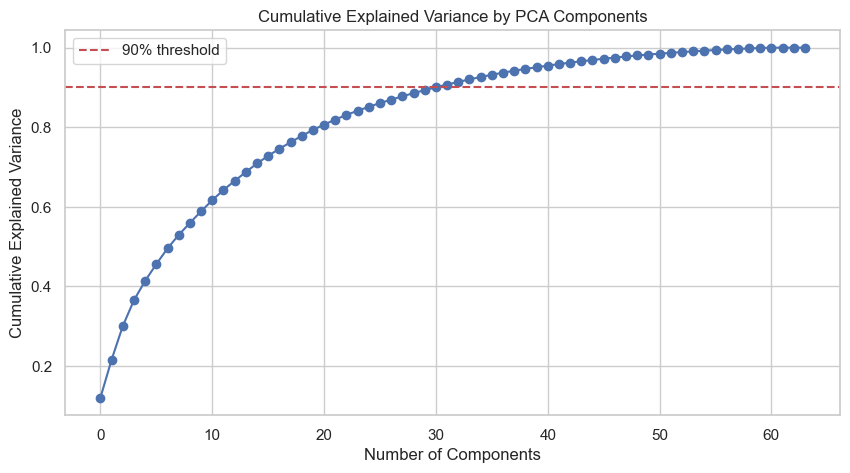

In [3]:

# Apply PCA to all components
pca = PCA()
X_pca_full = pca.fit_transform(X_scaled)

# Plot cumulative explained variance
plt.figure(figsize=(10, 5))
plt.plot(np.cumsum(pca.explained_variance_ratio_), marker='o')
plt.title("Cumulative Explained Variance by PCA Components")
plt.xlabel("Number of Components")
plt.ylabel("Cumulative Explained Variance")
plt.grid(True)
plt.axhline(y=0.9, color='r', linestyle='--', label='90% threshold')
plt.legend()
plt.show()


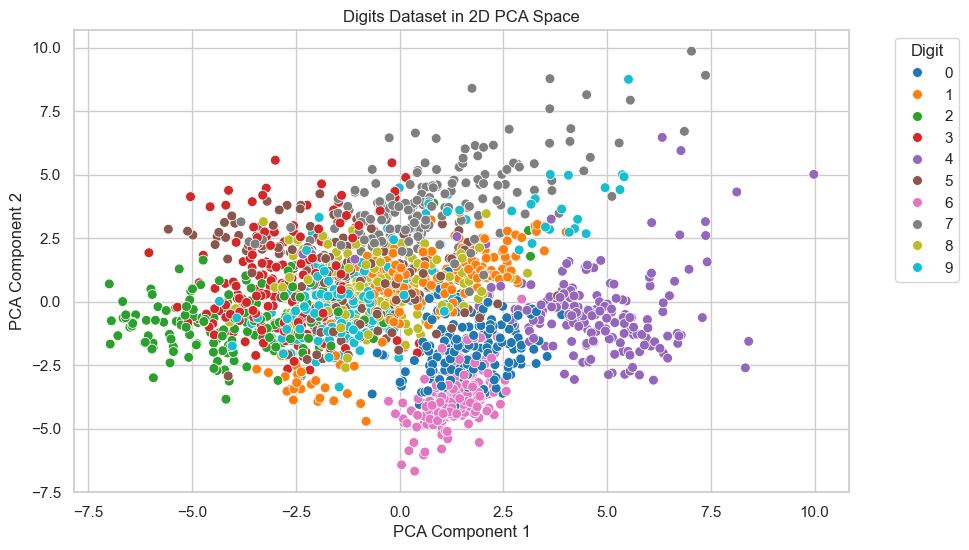

In [4]:

# Reduce to 2D for visualization
pca_2d = PCA(n_components=2)
X_pca_2d = pca_2d.fit_transform(X_scaled)

plt.figure(figsize=(10, 6))
sns.scatterplot(x=X_pca_2d[:, 0], y=X_pca_2d[:, 1], hue=y, palette="tab10", s=50)
plt.title("Digits Dataset in 2D PCA Space")
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.legend(title="Digit", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()


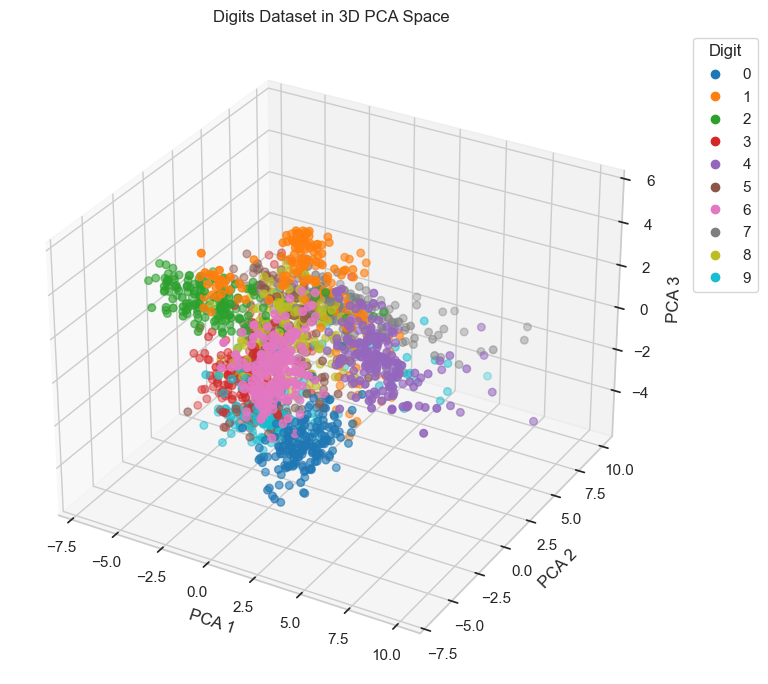

In [5]:

# Reduce to 3D for visualization
pca_3d = PCA(n_components=3)
X_pca_3d = pca_3d.fit_transform(X_scaled)

fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')
scatter = ax.scatter(X_pca_3d[:, 0], X_pca_3d[:, 1], X_pca_3d[:, 2], c=y, cmap='tab10', s=30)
ax.set_title("Digits Dataset in 3D PCA Space")
ax.set_xlabel("PCA 1")
ax.set_ylabel("PCA 2")
ax.set_zlabel("PCA 3")
plt.legend(*scatter.legend_elements(), title="Digit", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()
